<a href="https://colab.research.google.com/github/Pxxx010/Desafio-Data-Science/blob/main/Desafio_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests

In [ ]:
url = "https://raw.githubusercontent.com/Pxxx010/Desafio-Data-Science/main/INSE_2021_escolas.xlsx"
download = requests.get(url).content
df = pd.read_excel(io.BytesIO(download))
df.head()

# Tratamento da Tabela

In [25]:
# Dicionário para renomear as colunas
colunas_renomeadas = {
    'NU_ANO_SAEB': 'Ano do Saeb',
    'SG_UF': 'UF',
    'NO_MUNICIPIO': 'Município',
    'NO_ESCOLA': 'Nome da Escola',
    'TP_TIPO_REDE': 'Dependência Administrativa',
    'TP_LOCALIZACAO': 'Localização',
    'TP_CAPITAL': 'Área da Escola',
    'MEDIA_INSE': 'Média do Indicador de Nível Socioeconômico dos alunos da escola',
    'QTD_ALUNOS_INSE': 'Quantidade de Alunos com INSE calculado'
}

df = df.rename(columns=colunas_renomeadas)

df.head()

In [ ]:
# Lista de colunas a serem removidas
colunas_para_remover = ['CO_UF', 'ID_ESCOLA', 'CO_MUNICIPIO']

# Remover as colunas
df = df.drop(columns=colunas_para_remover)

df.head()

In [ ]:
# Dicionário para substituir os valores na coluna 'Dependência Administrativa, Localização, Área da Escola'
dependencia_administrativa_map = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal'
}

localizacao_map = {
    1: 'Urbana',
    2: 'Rural'
}

area_map = {
    1: 'Capital',
    2: 'Interior'
}

df['Dependência Administrativa'] = df['Dependência Administrativa'].map(dependencia_administrativa_map)

df['Localização'] = df['Localização'].map(localizacao_map)

df['Área da Escola'] = df['Área da Escola'].map(area_map)

df.head()

In [ ]:
# Imprimir a quantidade de valores faltantes em cada coluna antes do tratamento
print("\nValores faltantes:")
print(df.isnull().sum())

In [ ]:
# Exibir estatísticas descritivas do DataFrame
print("\nEstatísticas Descritivas:")
print(df.describe(include='all'))

In [33]:
# Salvar o DataFrame tratado como um arquivo Excel
df.to_excel("INSE_2021_escolas_tratado.xlsx", index=False)

# Fazer o download do arquivo Excel
from google.colab import files
files.download("INSE_2021_escolas_tratado.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Agregações e visualizações dos dados do INSE 2021.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

RESULTS_DIR = "results"

# Criar diretório para salvar as imagens, se não existir
os.makedirs(RESULTS_DIR, exist_ok=True)

# Configurar estilo dos gráficos usando seaborn
sns.set_theme(style="darkgrid")

# Set the color palette
sns.set_palette("husl")

In [39]:
# Carregar o arquivo Excel tratado
df = pd.read_excel("INSE_2021_escolas_tratado.xlsx")

## --- Agregações e Visualizações ---

## 1. Média do INSE por Unidade da Federação (UF)

Este gráfico mostra a média do INSE dos alunos por estado brasileiro. Ele permite identificar quais unidades da federação possuem, em média, alunos em contextos socioeconômicos mais elevados ou mais vulneráveis.


<ipython-input-44-3e6a223bac9e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_inse_uf.index, y=media_inse_uf.values, palette="viridis")


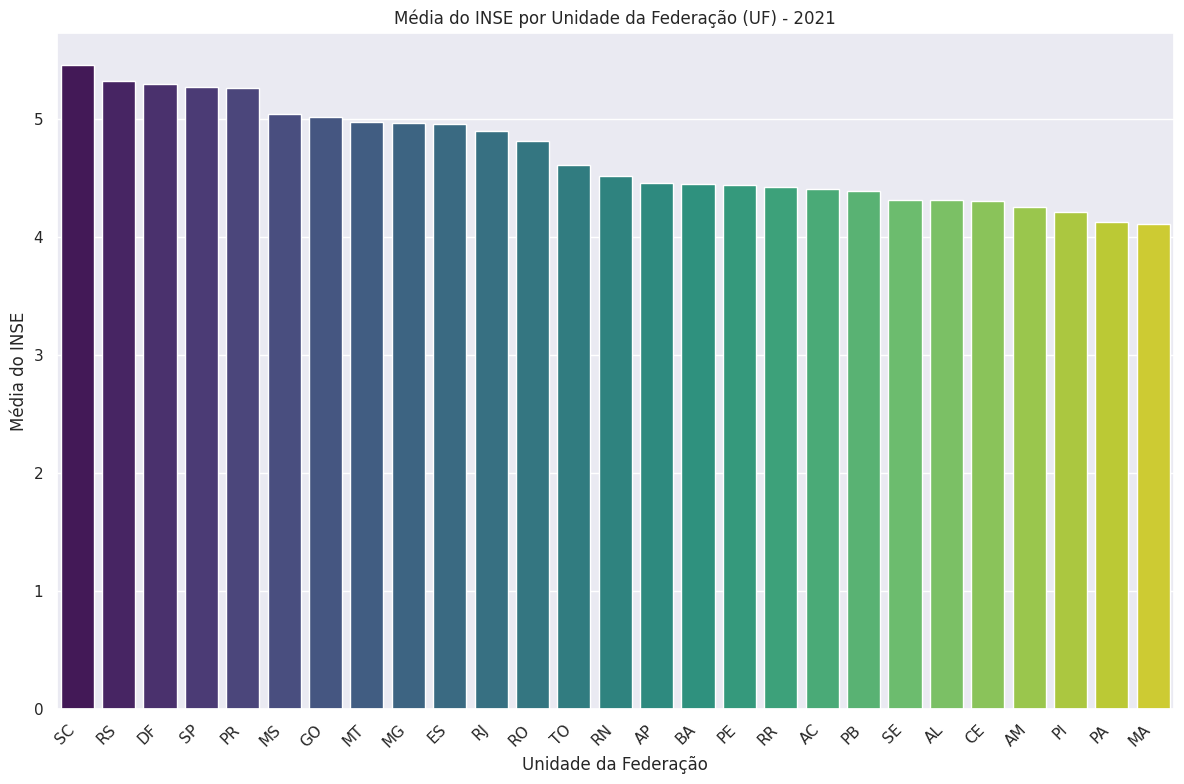

Gráfico 'media_inse_por_uf.png' salvo.


In [44]:
# 1. Média do INSE por Unidade da Federação (UF)
media_inse_uf = df.groupby("UF")["Média do Indicador de Nível Socioeconômico dos alunos da escola"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=media_inse_uf.index, y=media_inse_uf.values, palette="viridis")
plt.title("Média do INSE por Unidade da Federação (UF) - 2021")
plt.xlabel("Unidade da Federação")
plt.ylabel("Média do INSE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "media_inse_por_uf.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Gráfico 'media_inse_por_uf.png' salvo.")

## 2. Distribuição da Média do INSE por Tipo de Rede

Utilizando um boxplot, este gráfico compara a distribuição da média do INSE entre as diferentes dependências administrativas (Federal, Estadual, Municipal e Privada). É útil para observar a variação e a mediana do INSE em cada tipo de rede, além de identificar possíveis outliers.

<ipython-input-46-7114793ad120>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dependência Administrativa", y="Média do Indicador de Nível Socioeconômico dos alunos da escola", data=df, palette="coolwarm", order=["Federal", "Estadual", "Municipal", "Privada"])


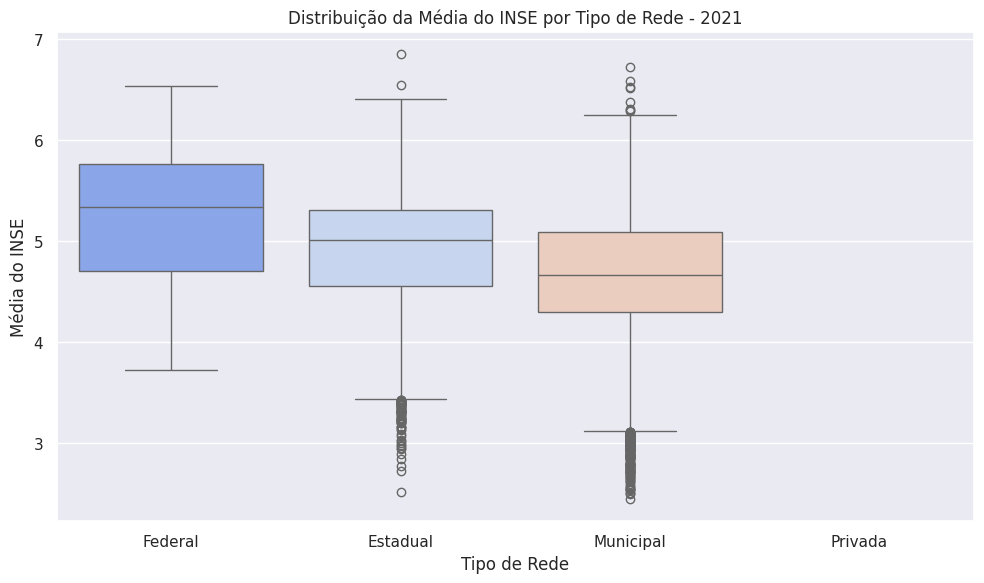

Gráfico 'distribuicao_inse_por_rede.png' salvo.


In [46]:
# 2. Distribuição da Média do INSE por Tipo de Rede
# Mapear códigos para nomes para melhor visualização
plt.figure(figsize=(10, 6))
sns.boxplot(x="Dependência Administrativa", y="Média do Indicador de Nível Socioeconômico dos alunos da escola", data=df, palette="coolwarm", order=["Federal", "Estadual", "Municipal", "Privada"])
plt.title("Distribuição da Média do INSE por Tipo de Rede - 2021")
plt.xlabel("Tipo de Rede")
plt.ylabel("Média do INSE")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(RESULTS_DIR, "distribuicao_inse_por_rede.png"), dpi=300, bbox_inches='tight')
plt.close()

print("Gráfico 'distribuicao_inse_por_rede.png' salvo.")


## 3. Média do INSE por Localização da Escola (Urbana/Rural)

Este gráfico apresenta a média do INSE das escolas de acordo com sua localização (urbana ou rural). Ele evidencia diferenças socioeconômicas médias entre estudantes de áreas urbanas e rurais.

<ipython-input-47-3e30506db579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_inse_localizacao.index, y=media_inse_localizacao.values, palette="pastel")


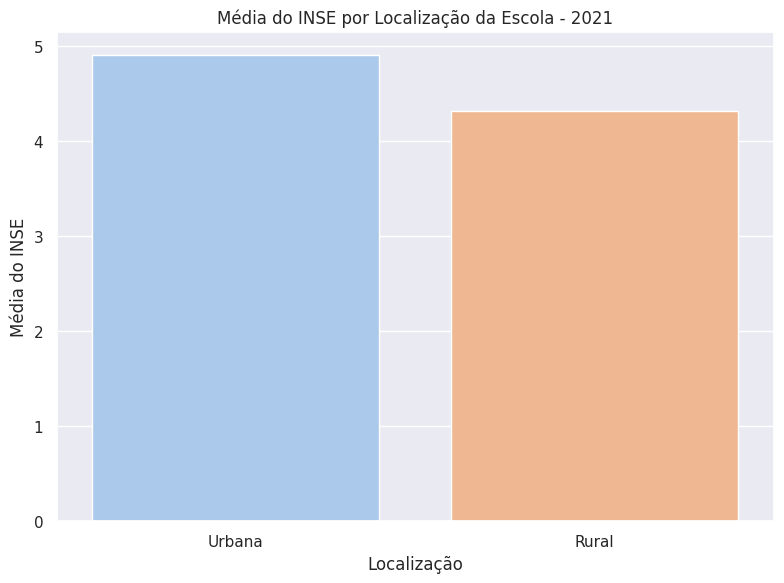

Gráfico 'media_inse_por_localizacao.png' salvo.


In [47]:
# 3. Média do INSE por Localização (Urbana/Rural)
media_inse_localizacao = df.groupby("Localização")["Média do Indicador de Nível Socioeconômico dos alunos da escola"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=media_inse_localizacao.index, y=media_inse_localizacao.values, palette="pastel")
plt.title("Média do INSE por Localização da Escola - 2021")
plt.xlabel("Localização")
plt.ylabel("Média do INSE")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(RESULTS_DIR, "media_inse_por_localizacao.png"), dpi=300, bbox_inches='tight')
plt.close()

print("Gráfico 'media_inse_por_localizacao.png' salvo.")


## 4. Distribuição de Escolas por Classificação do INSE

Este gráfico mostra a contagem de escolas segundo a classificação do INSE (Muito Baixo, Baixo, Médio Baixo, Médio, Médio Alto, Alto e Muito Alto). Ele ajuda a entender a distribuição das escolas brasileiras entre os diferentes níveis socioeconômicos definidos pelo INSE.

<ipython-input-49-b866434b4ff7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="INSE_CLASSIFICACAO", data=df, order = sorted(df["INSE_CLASSIFICACAO"].unique()), palette="Spectral")


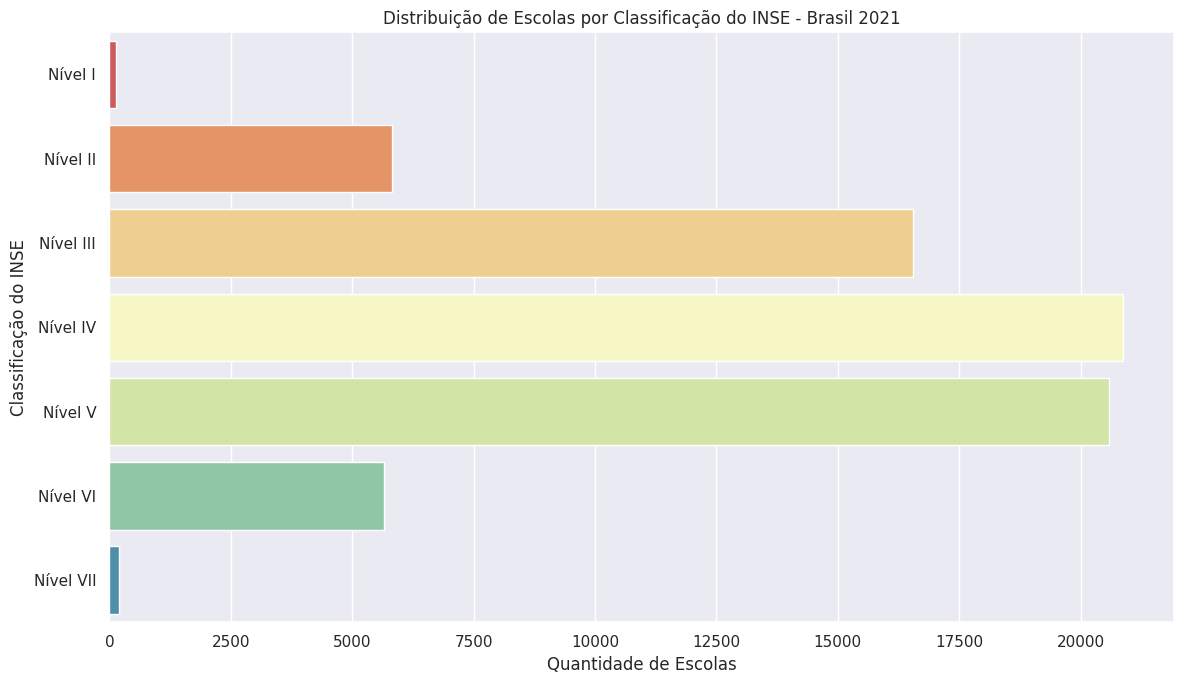

Gráfico 'distribuicao_classificacao_inse_geral.png' salvo.


In [49]:
# 4. Distribuição das Classificações do INSE (Geral)
plt.figure(figsize=(12, 7))
sns.countplot(y="INSE_CLASSIFICACAO", data=df, order = sorted(df["INSE_CLASSIFICACAO"].unique()), palette="Spectral")
plt.title("Distribuição de Escolas por Classificação do INSE - Brasil 2021")
plt.xlabel("Quantidade de Escolas")
plt.ylabel("Classificação do INSE")
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "distribuicao_classificacao_inse_geral.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Gráfico 'distribuicao_classificacao_inse_geral.png' salvo.")

## 5. Média de Alunos (Considerados para o INSE) por Tipo de Rede

Este gráfico exibe a média de alunos utilizados para o cálculo do INSE por tipo de rede. Ele fornece uma ideia do porte médio das escolas em termos de alunos com dados válidos para cálculo do INSE, por dependência administrativa.


<ipython-input-51-423faddaf749>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


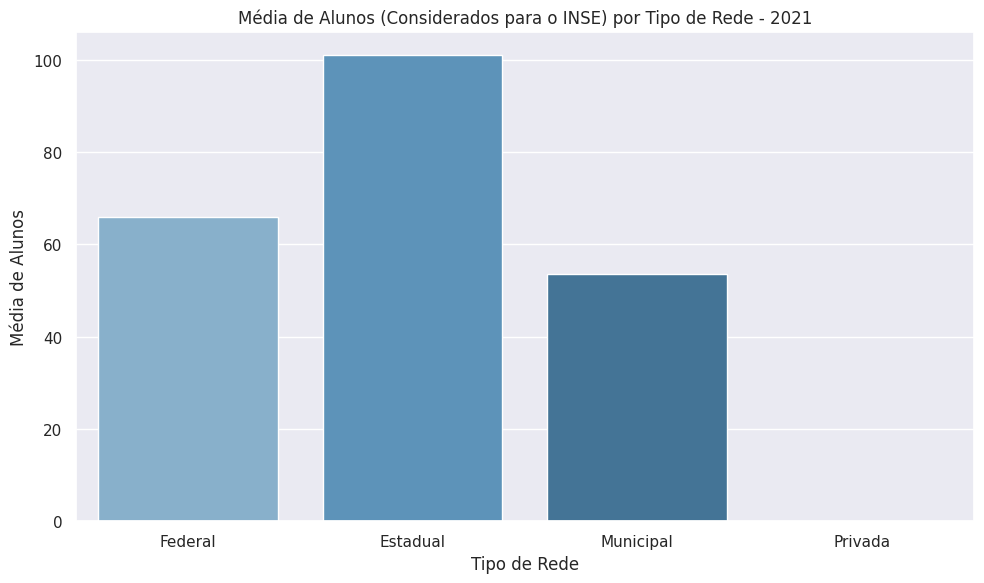

Gráfico 'media_alunos_por_rede.png' salvo.


In [51]:
# 5. Média de Alunos por Tipo de Rede
media_alunos_rede = df.groupby("Dependência Administrativa")["Quantidade de Alunos com INSE calculado"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_alunos_rede.index,
    y=media_alunos_rede.values,
    palette="Blues_d",
    order=["Federal", "Estadual", "Municipal", "Privada"]
)
plt.title("Média de Alunos (Considerados para o INSE) por Tipo de Rede - 2021")
plt.xlabel("Tipo de Rede")
plt.ylabel("Média de Alunos")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(RESULTS_DIR, "media_alunos_por_rede.png"), dpi=300, bbox_inches='tight')
plt.close()

print("Gráfico 'media_alunos_por_rede.png' salvo.")